In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [148]:
books_df = pd.read_csv(r"C:\Users\boulanger\OneDrive\Bureau\DataML\books.csv", delimiter=";", encoding='utf-8')

In [149]:
books_df.head(10)

,bookID,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,9.780440e+12,eng,652.0,2095690.0,27591.0,9/16/2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,9.780440e+12,eng,870.0,2153167.0,29221.0,09/01/2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,9.780440e+12,eng,352.0,6333.0,244.0,11/01/2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,9.780440e+12,eng,435.0,2339585.0,36325.0,05/01/2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,9.780440e+12,eng,2690.0,41428.0,164.0,9/13/2004
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,9.780980e+12,en-US,152.0,19.0,1.0,4/26/2005
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,9.780440e+12,eng,3342.0,28242.0,808.0,09/12/2005
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,9.780520e+12,eng,815.0,3628.0,254.0,11/01/2005
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,9.780350e+12,eng,815.0,249558.0,4080.0,4/30/2002
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,9.781400e+12,eng,215.0,4930.0,460.0,08/03/2004


In [150]:
books_df.tail()

,bookID,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,9.781560e+12,eng,512.0,156.0,20.0,12/21/2004
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,9.780140e+12,eng,635.0,783.0,56.0,12/01/1988
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,9.780140e+12,eng,415.0,820.0,95.0,08/01/1993
11125,45639,Poor People,William T. Vollmann,3.72,9.780060e+12,eng,434.0,769.0,139.0,2/27/2007
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,9.788500e+12,spa,272.0,113.0,12.0,5/28/2006


In [151]:
# Concise summary of the DataFrame
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11076 non-null  object 
 3   average_rating      11076 non-null  float64
 4   isbn13              11076 non-null  float64
 5   language_code       11076 non-null  object 
 6     num_pages         11076 non-null  float64
 7   ratings_count       11076 non-null  float64
 8   text_reviews_count  11076 non-null  float64
 9   publication_date    11076 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 869.4+ KB


In [152]:
missing_values = books_df.isnull()

In [153]:
print(missing_values)

       bookID  title  authors  average_rating  isbn13  language_code  \
0       False  False    False           False   False          False   
1       False  False    False           False   False          False   
2       False  False    False           False   False          False   
3       False  False    False           False   False          False   
4       False  False    False           False   False          False   
...       ...    ...      ...             ...     ...            ...   
11122   False  False    False           False   False          False   
11123   False  False    False           False   False          False   
11124   False  False    False           False   False          False   
11125   False  False    False           False   False          False   
11126   False  False    False           False   False          False   

         num_pages  ratings_count  text_reviews_count  publication_date  
0            False          False               False        

In [154]:
len(books_df)

11127

In [155]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11076 non-null  object 
 3   average_rating      11076 non-null  float64
 4   isbn13              11076 non-null  float64
 5   language_code       11076 non-null  object 
 6     num_pages         11076 non-null  float64
 7   ratings_count       11076 non-null  float64
 8   text_reviews_count  11076 non-null  float64
 9   publication_date    11076 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 869.4+ KB


In [156]:
books_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11076.000000,1.107600e+04,11076.000000,1.107600e+04,11076.000000
mean,21310.938887,3.933427,9.759792e+12,336.239617,1.787791e+04,540.981492
std,13093.358023,0.350747,4.439127e+11,241.132655,1.126977e+05,2581.313744
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780350e+12,192.000000,1.030000e+02,9.000000
50%,20287.000000,3.960000,9.780590e+12,299.000000,7.380000e+02,46.000000
75%,32104.500000,4.130000,9.780870e+12,416.000000,4.929250e+03,235.000000
max,45641.000000,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000


In [157]:
print(books_df.shape)

(11127, 10)


In [158]:
books_df.nunique()

bookID                11127
title                 10350
authors                6625
average_rating          208
isbn13                  238
language_code            26
  num_pages             995
ratings_count          5264
text_reviews_count     1807
publication_date       3672
dtype: int64

In [159]:
#1.Data Cleaning

In [160]:
#The column num_pages has a whitespace compared to other lines

In [161]:
# Converting Index object to a list of strings
columns_list = books_df.columns.tolist()

# Removing whitespaces from each column name using list comprehension
columns_list = [col.lstrip() for col in columns_list]

# Updating the DataFrame's columns with the modified list
books_df.columns = columns_list

In [162]:
# Remove leading whitespaces from column names
books_df.columns = books_df.columns.str.lstrip()

In [163]:
books_df['language_code'].value_counts()

eng      8862
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [164]:
# On the line : Frederick Zimmerman , we can see " en-US" , we just want to replace by "eng"

In [165]:
#Replacing "en-US", "en-GB", "en-CA" with "eng"

In [166]:
books_df.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', nan, 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'ita',
       'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla', 'ale'],
      dtype=object)

In [167]:
books_df['language_code']= books_df['language_code'].replace(['en-US','en-GB','en-CA', "enm"],'eng')

In [168]:
books_df.language_code.unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', nan, 'ger', 'jpn', 'ara', 'nl',
       'zho', 'lat', 'por', 'ita', 'rus', 'msa', 'glg', 'wel', 'swe',
       'nor', 'tur', 'gla', 'ale'], dtype=object)

In [169]:
#Data Preprocessing

In [170]:
correlation_matrix = books_df.corr(numeric_only=True)

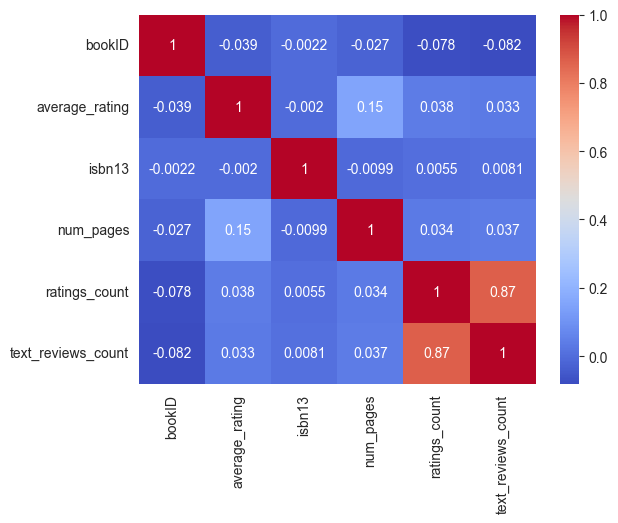

In [171]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

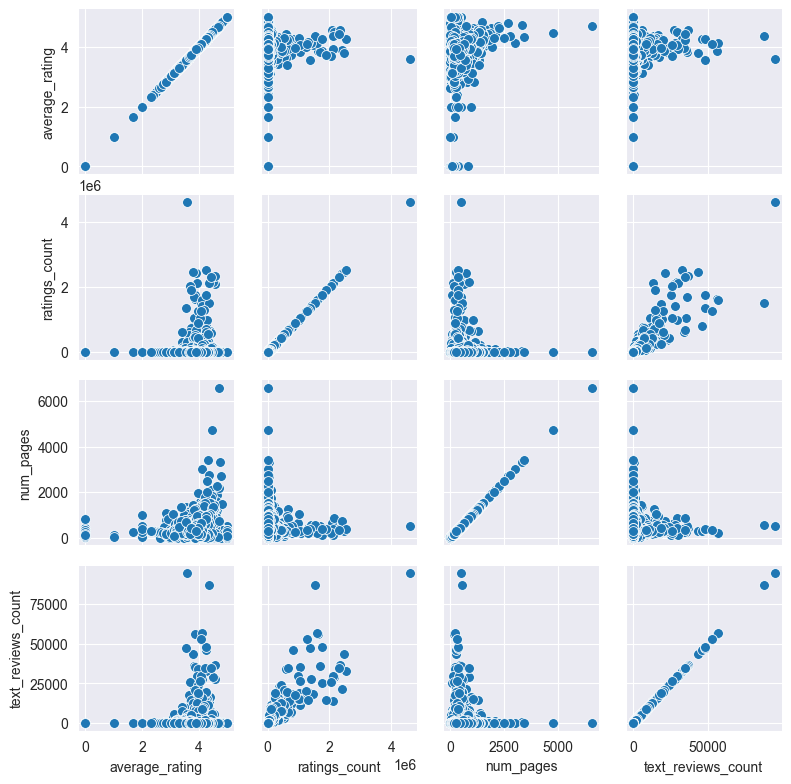

In [172]:
#Visualize the distribution and relationships between numerical variables
sns.set_style("darkgrid")
numerical_plot = sns.PairGrid(books_df, vars=['average_rating', 'ratings_count', 'num_pages','text_reviews_count'], height = 2)
numerical_plot.map(sns.scatterplot,  s=50, edgecolor="white")

In [173]:
#Feature Selection

In [174]:
#'Average Rating' and 'Number of Pages'.

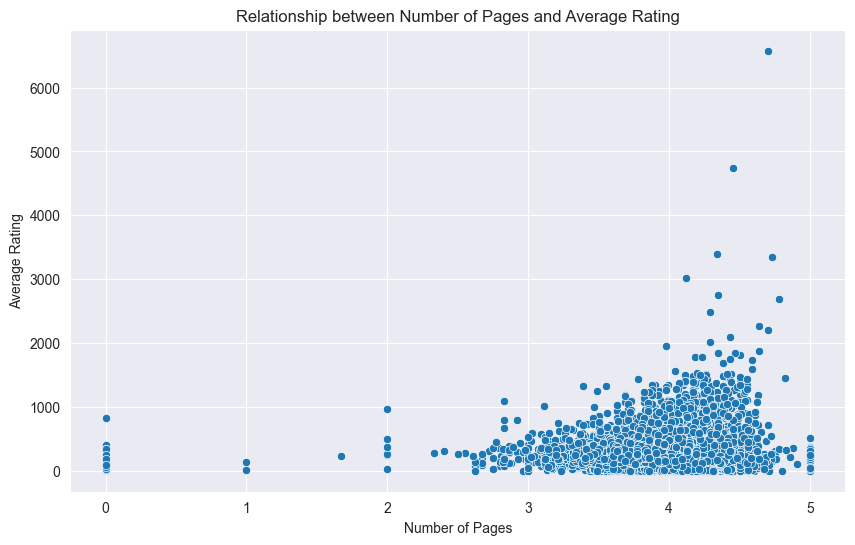

In [175]:
# Assuming data_books is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rating', y='num_pages', data=books_df)
plt.title('Relationship between Number of Pages and Average Rating')
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.show()


In [176]:
#Barplot between Language and Average Rating

In [177]:
#import seaborn as sns

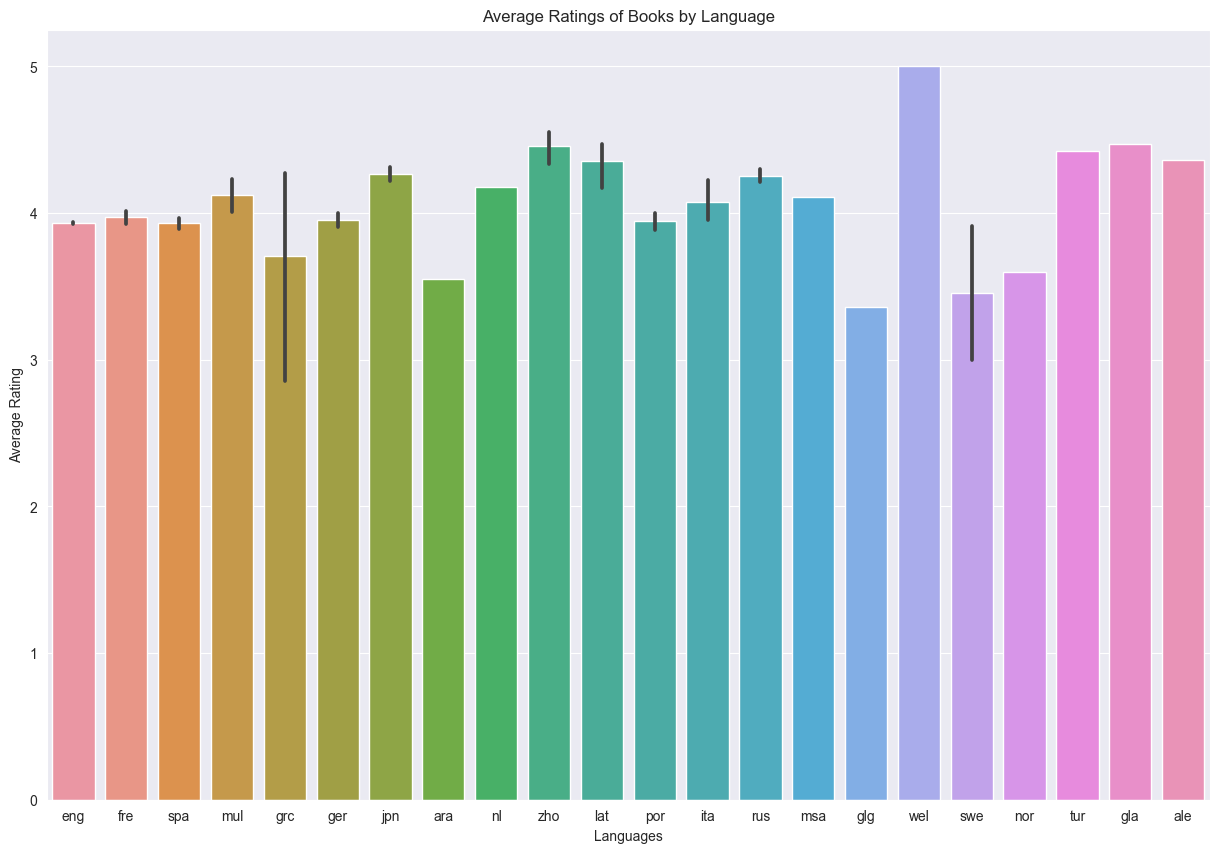

In [178]:
plt.figure(figsize=(15, 10))
sns.barplot(data=books_df, x='language_code', y='average_rating')
plt.xlabel('Languages')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Books by Language')
plt.show()

In [179]:
#Data by "language_code" and calculate the mean for the "pages" and "rating" columns
books_df.groupby(["language_code"]).mean(numeric_only=True)

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
language_code,,,,,,
ale,44012.000000,4.360000,9.780350e+12,512.000000,102.000000,16.000000
ara,4315.000000,3.550000,9.789770e+12,349.000000,122.000000,12.000000
eng,21285.770059,3.930226,9.758432e+12,335.476177,18721.611492,567.975986
fre,20325.159722,3.971528,9.782231e+12,339.000000,3277.319444,64.513889
ger,22622.858586,3.950101,9.783323e+12,391.979798,234.727273,8.232323
gla,43504.000000,4.470000,9.781580e+12,250.000000,11.000000,0.000000
glg,23114.000000,3.360000,9.788500e+12,741.000000,36.000000,2.000000
grc,10642.272727,3.707273,9.780870e+12,413.363636,52.454545,2.454545
ita,27878.000000,4.078000,9.787124e+12,400.600000,3234.400000,55.800000


In [180]:
#Calculating the average rating for each author

In [181]:
author_avg_ratings = books_df.groupby('authors')['average_rating'].mean()

#Average rating in descending order
sorted_authors = author_avg_ratings.sort_values(ascending=False)

In [182]:
print("Authors with highest average ratings:")
print(sorted_authors.head(10))

Authors with highest average ratings:
authors
R. McL. Wilson                                      5.0
James E. Campbell                                   5.0
Chris    Green/Chris Wright/Paul Douglas Gardner    5.0
Ian        Martin/Katie Elliott                     5.0
Todd Davis/Marc Frey                                5.0
Sara Barton-Wood                                    5.0
Julie Sylvester/David Sylvester                     5.0
Sheri Rose Shepherd                                 5.0
John  Diamond                                       5.0
Keith Donohue                                       5.0
Name: average_rating, dtype: float64


In [183]:
#Basic summary statistic

In [184]:
books_df[books_df['average_rating'] == 5]

,bookID,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,9.780200e+12,grc,364.0,0.0,0.0,2/22/1922
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,9.783830e+12,eng,83.0,1.0,0.0,09/01/2006
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,9.780440e+12,eng,32.0,4.0,1.0,01/01/2002
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,9.780740e+12,eng,128.0,2.0,0.0,3/17/2003
4126,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,9.780740e+12,eng,128.0,2.0,0.0,03/06/2003
4790,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,9.781890e+12,eng,74.0,5.0,3.0,02/01/2006
4935,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,9.780530e+12,eng,202.0,4.0,0.0,01/01/1975
5025,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,9.780850e+12,eng,96.0,1.0,0.0,06/01/2004
5476,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,9.780560e+12,eng,2.0,3.0,0.0,04/01/1996
5478,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,9.780560e+12,eng,2.0,2.0,0.0,10/02/1995


In [185]:
#The most published books 

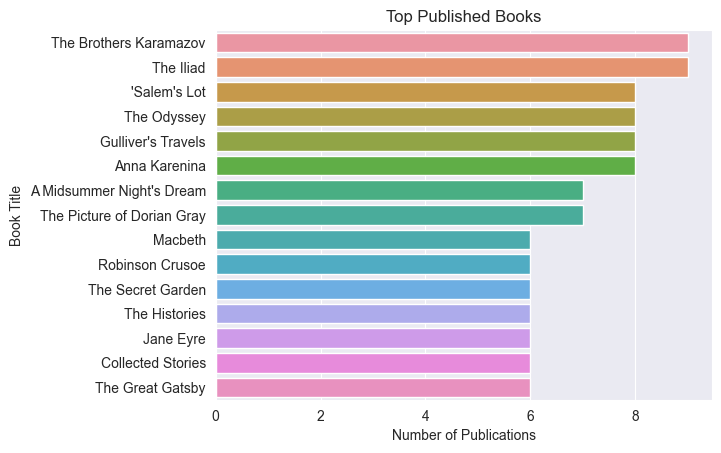

In [186]:
#Bar graph
sns.barplot(x=books_df['title'].value_counts()[:15], y=books_df['title'].value_counts()[:15].index)

plt.title('Top Published Books')
plt.xlabel('Number of Publications')
plt.ylabel('Book Title')


plt.show()

In [187]:
#Question 3 - Which date were the biggest number of books written? 

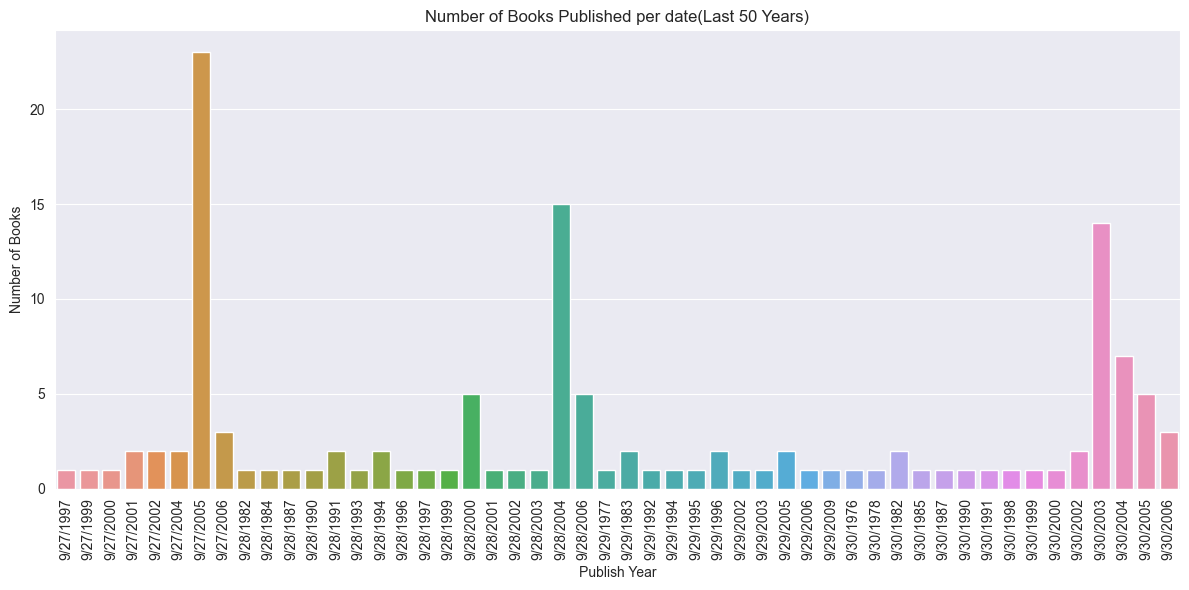

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

yearly_counts = books_df['publication_date'].value_counts().sort_index()

# Period 50 years of data 
last_50_years = yearly_counts.tail(50)

# Create the bar plot
books_years = sns.barplot(x=last_50_years.index, y=last_50_years)
books_years.set_xticklabels(books_years.get_xticklabels(), rotation=90)
books_years.set_xlabel('Publish Year')
books_years.set_ylabel('Number of Books')
books_years.set_title('Number of Books Published per date(Last 50 Years)')

plt.tight_layout()
plt.show()

In [189]:
#Question 4 - Books received each rating

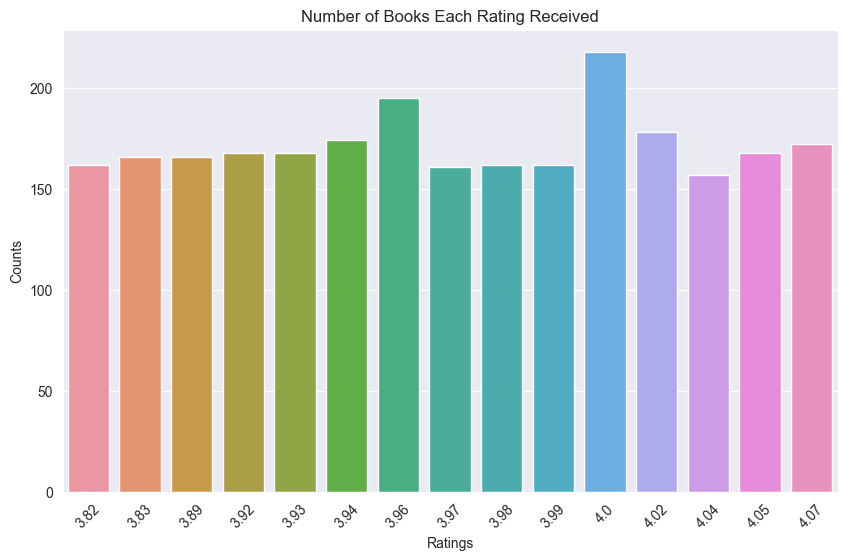

In [190]:
plt.figure(figsize=(10, 6)) 

rating_counts = books_df['average_rating'].value_counts().head(15)
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Number of Books Each Rating Received')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [191]:
#Model training and evaluation

In [192]:
books_df =books_df.drop(books_df.index[books_df ['ratings_count'] >= 1000000])

In [193]:
books_df =books_df.drop(books_df.index[books_df ['text_reviews_count'] >= 20000])

In [194]:
le = preprocessing.LabelEncoder()
books_df['title'] = le.fit_transform(books_df['title'])

In [195]:
books_df['authors'] = le.fit_transform(books_df['authors'])

In [196]:
books_df['language_code'] = le.fit_transform(books_df['language_code'])

In [197]:
books_df['publication_date'] = le.fit_transform(books_df['publication_date'])

In [198]:
books_df = books_df.dropna()

In [199]:
#Splitting the data

In [200]:
X = books_df.drop('average_rating',axis=1) # Independet variable/ Attributes
y = books_df['average_rating'] # dependent variable / Label

# Split the Data into 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=23)

In [201]:
model = LinearRegression().fit(X_train, y_train) 

In [202]:
lr_y_pred = model.predict(X_test)

In [203]:
from sklearn.metrics import r2_score
r2_score(y_test, lr_y_pred)

0.02532420467706009

   Actual  Predictions
0    3.71     3.880770
1    3.88     3.922946
2    3.77     3.864894
3    3.85     3.939688
4    4.26     3.972324
5    4.09     4.020085
6    4.03     3.925347
7    3.45     3.914797
8    4.27     3.902250
9    3.89     3.932212


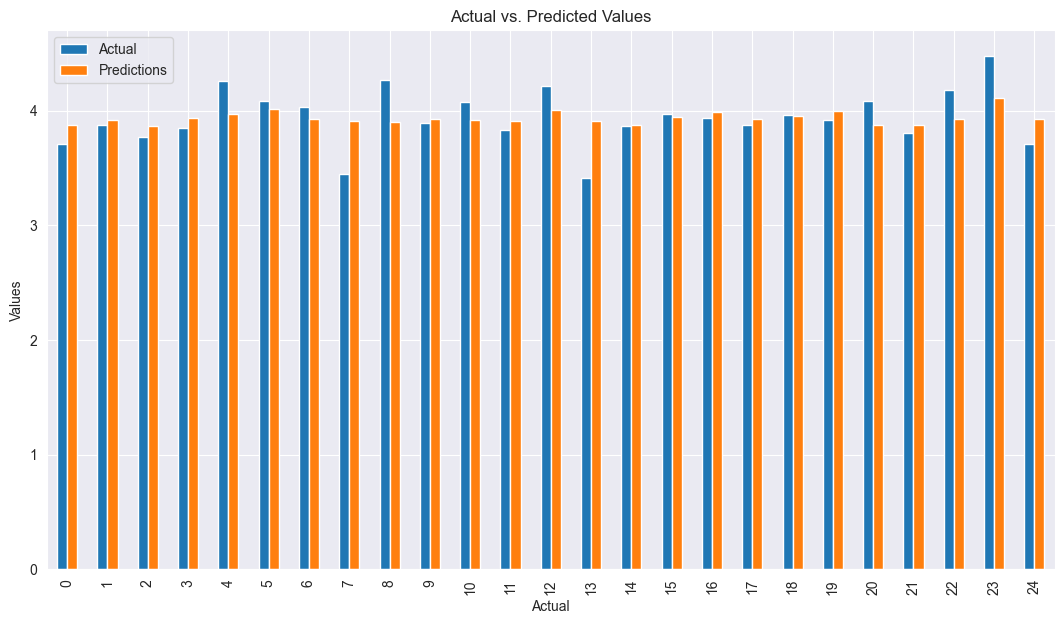

In [204]:
prd = pd.DataFrame({'Actual': y_test.tolist(), 'Predictions': lr_y_pred.tolist()}).head(25)

# Display the first 10 rows of the DataFrame
print(prd.head(10))

# Plot a bar chart
prd.plot(kind='bar', figsize=(13, 7))
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Values')
plt.show()

In [205]:
# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, lr_y_pred)
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, lr_y_pred)
print('Mean Squared Error:', mse)

Mean Absolute Error: 0.2284686208364079
Mean Squared Error: 0.11709217255811233


In [206]:
#Decision Tree

In [207]:
from sklearn.tree import DecisionTreeRegressor 

# Training the algorithm
regressor = DecisionTreeRegressor().fit(X_train, y_train) 

# Using our test data and see how accurately our algorithm predicts the average rating 
dt_y_pred = regressor.predict(X_test)

In [208]:
r2_score(y_test,dt_y_pred)

-0.5308817294828811

In [211]:
# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, dt_y_pred)
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, dt_y_pred)
print('Mean Squared Error:', mse)

Mean Absolute Error: 0.30200181159420286
Mean Squared Error: 0.1839116847826087


   Actuel  Predictions
0    3.71         4.25
1    3.88         4.36
2    3.77         4.23
3    3.85         4.02
4    4.26         3.99


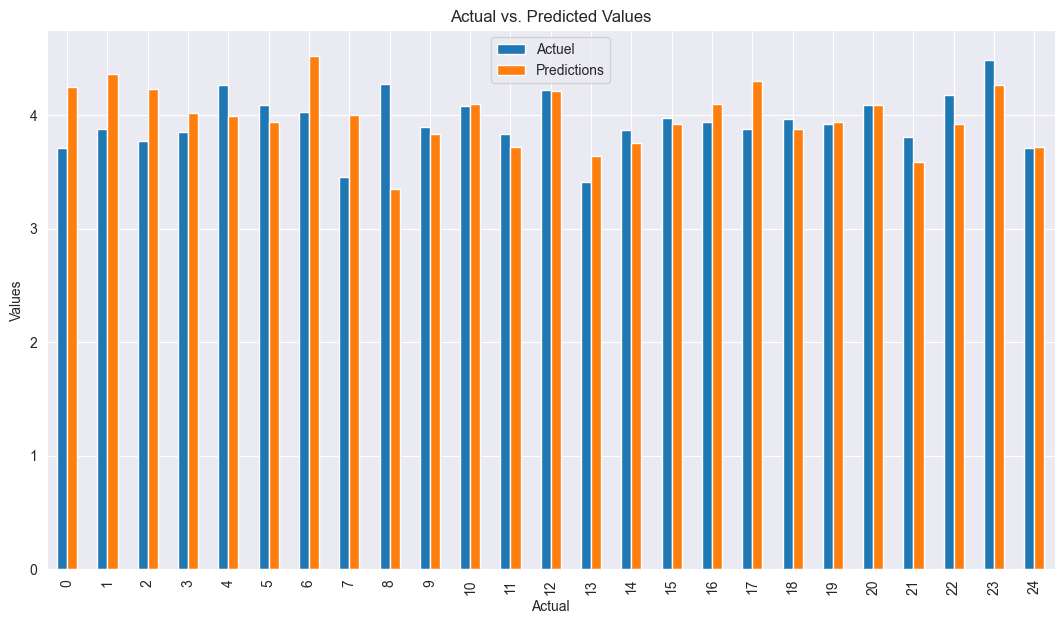

In [214]:
prd = pd.DataFrame({'Actuel': y_test.tolist(), 'Predictions': dt_y_pred.tolist()}).head(25)

# Display the first 10 rows of the DataFrame
print(prd.head(5))

# Plot a bar chart
prd.plot(kind='bar', figsize=(13, 7))
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Values')
plt.show()